1. Significant earthquakes since 2150 B.C.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

sig_equs = pd.read_csv(r"C:\\Users\\yuanwenting\\Documents\\ESE5023\\assignment\earthquakes-2022-11-01_08-12-02_+0800.tsv",sep='\t')
sig_equs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,NaN,2022.0,9.0,22.0,6.0,16.0,9.0,5861.0,NaN,MEXICO,...,NaN,NaN,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
6335,NaN,2022.0,9.0,30.0,19.0,28.0,40.0,NaN,NaN,INDONESIA,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
6336,NaN,2022.0,10.0,5.0,0.0,21.0,29.0,NaN,NaN,IRAN,...,NaN,NaN,1127.0,4.0,NaN,3.0,NaN,2.0,NaN,3.0
6337,NaN,2022.0,10.0,5.0,8.0,26.0,21.0,NaN,NaN,PERU,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#1.1
#Aggregate the total number of deaths by country
s=sig_equs.groupby(['Country']).sum()['Deaths']
s
#In descending order, show the top 20
s.sort_values(ascending=False).head(20)

#This is summed up into a single code, as follows
#sig_equs.groupby(['Country']).sum()['Deaths'].sort_values(ascending=False).head(20)

Country
CHINA           2075019.0
TURKEY          1134569.0
IRAN            1011446.0
ITALY            498477.0
SYRIA            439224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            278142.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135479.0
TURKMENISTAN     117412.0
PERU             102219.0
ISRAEL            90388.0
PORTUGAL          83531.0
GREECE            79174.0
CHILE             64276.0
INDIA             63491.0
TAIWAN            57135.0
Name: Deaths, dtype: float64

<AxesSubplot:xlabel='Year'>

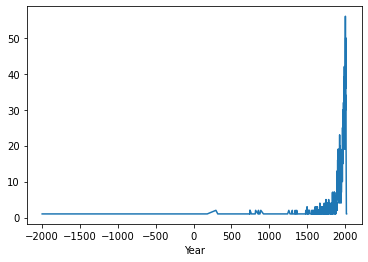

In [3]:
#1.2-方法1
s1=sig_equs.loc[sig_equs['Ms']>3.0]
s1.groupby(['Year']).count()['Ms'].plot()

#However, data with earthquake magnitude 3.0 or less will not be displayed

<AxesSubplot:xlabel='Year'>

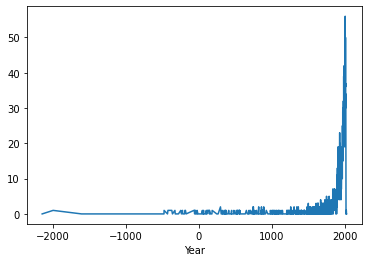

In [4]:
#1.2-方法2（better）
#Create a column named MS and consisting of 0
sig_equs['Ms1']=0
#Put the number greater than 3.0 in the Ms column in sig_equs into the new column Ms1 and assign it a value of 1
sig_equs.loc[(sig_equs['Ms']>3.0),['Ms1']]=1
#Plot the time series of total Ms1 in different years
sig_equs.groupby(['Year']).sum()['Ms1'].plot()

#Destructive earthquakes occur more frequently year by year.
#The frequency of destructive earthquakes may be due to increased plate jams.

In [5]:
#1.3
#为了节省页面方便浏览，下面所有代码运行后忽略红色的warning
import warnings
warnings.filterwarnings("ignore")
def CountEq_LargestEq(C):
    #N represents the total number of earthquakes in a given country,and C represents the country.
    N=sig_equs.groupby(['Country']).count()['Year'][C]
    #M represents the information about the largest earthquake in a given country.
    M=sig_equs.loc[(sig_equs['Country']==C)&(sig_equs['Mag']==sig_equs.groupby(['Country']).max()['Mag'][C])]
    #Making a new dataframe using a few columns in M to show the date and location of the largest earthquake in a given country.
    D_L=M[['Year','Mo','Dy','Mag','Location Name']]
    return (N,D_L)
CountEq_LargestEq('CHINA')

#[C]启发来自焦小乔同学

(616,
        Year   Mo    Dy  Mag              Location Name
 978  1668.0  7.0  25.0  8.5  CHINA:  SHANDONG PROVINCE)

In [6]:
#1.3-续
#c1 represents grouping by Country, but adding the Country index as a column resets the numeric index
c1=sig_equs.groupby(['Country']).count().reset_index()
#i represents the value in the Country column in C1.(Country name)
for i in c1['Country']: 
      print(i,CountEq_LargestEq(i))     

AFGHANISTAN (62,         Year   Mo   Dy  Mag             Location Name
2717  1909.0  7.0  7.0  8.1  AFGHANISTAN:  HINDU-KUSH)
ALBANIA (56,         Year   Mo    Dy  Mag  \
2385  1893.0  6.0  14.0  7.5   

                                          Location Name  
2385  ALBANIA: HIMARA, DHERMI, KUC, KUDHESI, VLORE, ...  )
ALGERIA (57,         Year    Mo    Dy  Mag       Location Name
4435  1980.0  10.0  10.0  7.1  ALGERIA:  NORTHERN)
ANTARCTICA (5,         Year   Mo    Dy  Mag    Location Name
4996  1998.0  3.0  25.0  8.1  BALLENY ISLANDS)
ANTIGUA AND BARBUDA (3,         Year   Mo    Dy  Mag                   Location Name
1049  1690.0  4.0  16.0  8.0  ANTIGUA; SAINT KITTS AND NEVIS)
ARGENTINA (21,         Year   Mo    Dy  Mag                  Location Name
3480  1944.0  1.0  15.0  7.8  ARGENTINA:  SAN JUAN PROVINCE)
ARMENIA (13,         Year    Mo   Dy  Mag                           Location Name
4690  1988.0  12.0  7.0  6.8  ARMENIA:  LENINAKAN, SPITAK, KIROVAKAN)
ATLANTIC OCEAN (6,    

2. Air temperature in Shenzhen during the past 25 years

In [7]:
#2
#事先浏览过excel数据，DOM不存在9、A、C、I、M、P、R、U的情况，T不存在负数，因此对数据筛选如下：
#0 = Passed gross limits check 
#1 = Passed all quality control checks
#4 = Passed gross limits check, data originate from an NCEI data source
#5 = Passed all quality control checks, data originate from an NCEI data source
B_W=pd.read_csv('Baoan_Weather_1998_2022.csv')

#选择TMP列”，“前的数据作为新的列['T']
#更新列['T']为”+“后的数据
#选择TMP列”，“后的数据作为新的列['DOM']
B_W['T']=B_W['TMP'].str.split(',', 1).str[0]
B_W['T']=B_W['T'].str.split('+', 1).str[1]
B_W['DOM']=B_W['TMP'].str.split(',', 1).str[1]

#新建列['date']、['year']、['month']、['time']
B_W['year']=pd.to_datetime(B_W['DATE'].str.split('T', 1).str[0]).dt.year
B_W['month']=pd.to_datetime(B_W['DATE'].str.split('T', 1).str[0]).dt.month
B_W

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,TMP,UA1,UG1,VIS,WG1,WND,T,DOM,year,month
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",0186,1,1998,1
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",0220,1,1998,1
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",0240,1,1998,1
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",0221,1,1998,1
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",0240,1,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1",0210,1,2022,10
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1",0201,1,2022,10
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1",0200,1,2022,10
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1",0200,1,2022,10


<AxesSubplot:xlabel='year,month'>

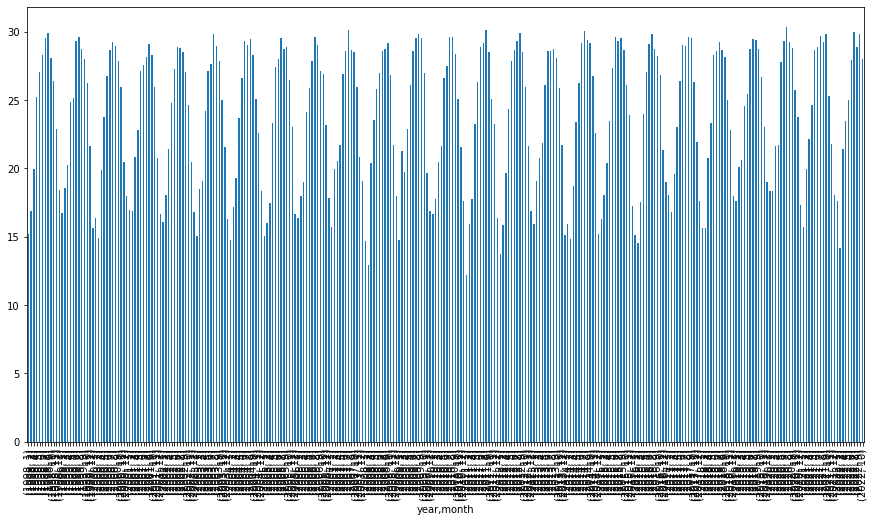

In [8]:
#2-续（1）
#对B_W数据进行筛选建立新的dateframe（B_W1）
#B_W1['T']由str类型转化为float类型并运算
#去除T>36.8℃的数据，建立新的dateframe（B_W2）
B_W1=B_W.loc[(B_W['T']!="9999")&((B_W['DOM']=="0")|(B_W['DOM']=="1")|(B_W['DOM']=="4")|(B_W['DOM']=="5"))]
B_W1['T']=B_W1['T'].astype(float)/10
B_W2=B_W1.loc[B_W1['T']<=36.8]
plt.figure(figsize=(15,8))
B_W2.groupby(['year','month']).mean()['T'].plot(kind='bar')

#25年来每年每月平均温度变化图

<AxesSubplot:xlabel='year'>

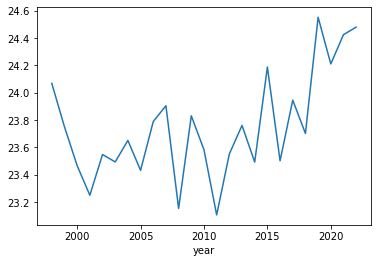

In [9]:
#2-续（2）
B_W2.groupby(['year']).mean()['T'].plot()
#25年来年平均温度变化图

<AxesSubplot:xlabel='month'>

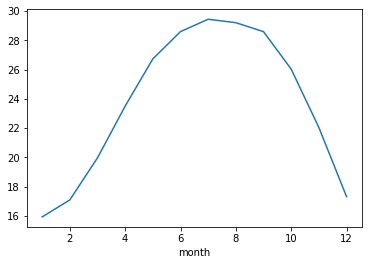

In [10]:
#2-续（3）
B_W2.groupby(['month']).mean()['T'].plot()
#平均25年，每月温度变化图

#过去25年月平均气温变化不大，2007年、2010年、2011年和2021年冬天较冷；
#年平均温度整体上是逐年升高的；
#深圳全年温暖，即使冬天月平均温度也基本在15℃左右；
#近些年深圳夏季月平均温度逼近30℃。

3. Global collection of hurricanes

In [11]:
#3
#usecols=range(16)读取0~15列（前16列）数据
#skiprows=[0, 2]跳过第0行，第2行
#parse_dates=['ISO_TIME']将ISO_TIME列格式解析成日期格式，解析不成功也不会出错，只按原格式输出
#na_values=['NOT_NAMED', 'NAME']NAME列NOT_NAMED被替换成了NaN

df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',usecols=range(16),skiprows=[1],parse_dates=['ISO_TIME'],na_values={'NAME':'NOT_NAMED','WMO_WIND':' '})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,,,main,43,0
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,,,main,0,0
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,,,main,0,0
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,,,main,0,0
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,,,main,0,0


In [12]:
#3.1
#观察原始表格发现同一个SID对应同一个NAME（同一个NAME可能对应多个SID），因此按SID分组和按SID、NAME分组效果相同。
#此处选择 SID、NAME分组只是为了多显示 NAME 这一列，另外 NAME 为 NOT_NAMED 的数据被忽略。
df.groupby(['SID','NAME']).max()['WMO_WIND'].sort_values(ascending=False).head(10)

#第三题题统一考虑台风最大三小时平均风速而不是最大台风期平均风速

SID            NAME    
2015293N13266  PATRICIA    185.0
1980214N11330  ALLEN       165.0
1988253N12306  GILBERT     160.0
2005289N18282  WILMA       160.0
1997253N12255  LINDA       160.0
2019236N10314  DORIAN      160.0
2009288N07267  RICK        155.0
2017242N16333  IRMA        155.0
2005261N21290  RITA        155.0
1998295N12284  MITCH       155.0
Name: WMO_WIND, dtype: float64

<AxesSubplot:xlabel='NAME'>

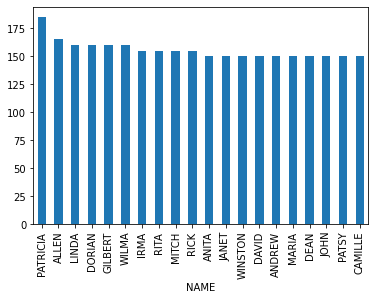

In [13]:
#3.2
df.groupby(['NAME']).max()['WMO_WIND'].sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:>

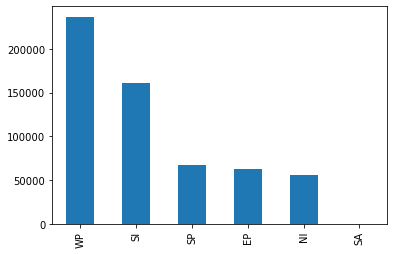

In [14]:
#3.3
df['BASIN'].value_counts().plot(kind='bar')

#7种BASIN只显示6种，其中 NA-North Atlantic数据可能被视为缺失值忽略了

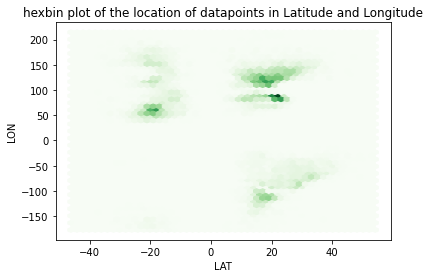

In [15]:
#3.4
#计算每个SID对应得LAT、LON
x=df.groupby(['SID']).mean()['LAT']
y=df.groupby(['SID']).mean()['LON']    
#作图
plt.hexbin(x, y, gridsize =50, cmap ='Greens') 
plt.title('hexbin plot of the location of datapoints in Latitude and Longitude') 
plt.xlabel('LAT') 
plt.ylabel('LON') 
plt.show() 

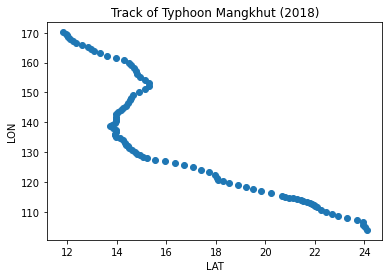

In [16]:
#3.5
#选择2018年NAME为MANGKHUT的台风数据
df1=df.loc[(df['NAME']=='MANGKHUT')&(df['SEASON']==2018)]
x=df1['LAT']
y=df1['LON']
#作图
plt.scatter(x, y)
plt.title('Track of Typhoon Mangkhut (2018)') 
plt.xlabel('LAT') 
plt.ylabel('LON') 
plt.show()

In [17]:
#3.6
#选择1970年以来，BASIN为WP或EP的台风数据
df2=df.loc[((df['SEASON']>=1970)&(df['BASIN']=='WP'))|((df['SEASON']>=1970)&(df['BASIN']=='EP'))]
df2

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0
707086,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952


In [18]:
#3.7
#将ISO_TIME列由日期格式转化为字符型
df2['ISO_TIME']=df2['ISO_TIME'].astype(str)
#将ISO_TIME列由字符型转化为时间型数据，并将ISO_TIME分开成date和time新的两列
df2['date']=pd.to_datetime(df2['ISO_TIME']).dt.date
df2['time']=pd.to_datetime(df2['ISO_TIME']).dt.time
df2

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,date,time
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,1970-02-19,00:00:00
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,1970-02-19,03:00:00
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,1970-02-19,06:00:00
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,1970-02-19,09:00:00
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,1970-02-19,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0,2022-10-10,15:00:00
707086,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,,2022-10-10,18:00:00
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974,2022-10-12,12:00:00
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952,2022-10-12,15:00:00


<AxesSubplot:xlabel='date'>

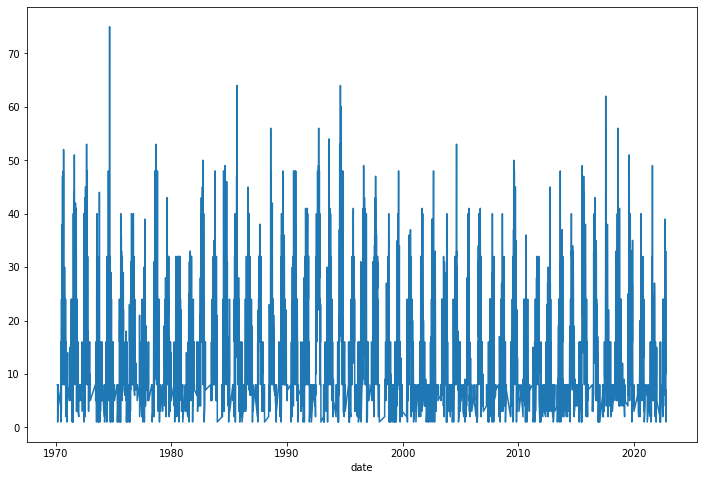

In [36]:
#3.7续
plt.figure(figsize=(12,8))
#每天的台风数据点数，作图
df2.groupby(['date']).count()['time'].plot()

#同一天可能发生多场不同NAME的台风，因此有些天数据点数量多

In [19]:
#3.8
import datetime
def day_of_year(Date):
    #Date按"-"分开为年y、月m、日d
    y,m,d=Date.split('-')
    #将y，m，d由字符型转化为整数型
    d1=datetime.date(int(y), int(m),int(d))
    #当前的日期减去上一年最后一天
    d2=d1-datetime.date(d1.year-1,12,31)   
    return d2.days  #返回天数（第几天）

df2['cdate']= df2['date'].astype(str)
#新建一行（第19行）
df2['c_days']=0
#df2总共有176352
for i in range(176352):
    #第19行c_days数据更新为，第18行cdate数据调用day_of_year函数后的结果
    df2.iloc[i,19]=day_of_year(df2.iloc[i,18])
df2.head(10)
#判断某一天是那一年中的第几天参照https://www.cnblogs.com/lyfstorm/p/11064480.html

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,date,time,cdate,c_days
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,1970-02-19,00:00:00,1970-02-19,50
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,1970-02-19,03:00:00,1970-02-19,50
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,1970-02-19,06:00:00,1970-02-19,50
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,1970-02-19,09:00:00,1970-02-19,50
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,1970-02-19,12:00:00,1970-02-19,50
350399,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 15:00:00,TS,8.21871,150.180,NaN,,,main,1195,1192,1970-02-19,15:00:00,1970-02-19,50
350400,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 18:00:00,TS,8.44444,149.811,NaN,992,tokyo,main,1206,1206,1970-02-19,18:00:00,1970-02-19,50
350401,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 21:00:00,TS,8.60053,149.378,NaN,,,main,1219,1213,1970-02-19,21:00:00,1970-02-19,50
350402,1970050N07151,1970,22,WP,MM,NANCY,1970-02-20 00:00:00,TS,8.66667,148.973,NaN,985,tokyo,main,1223,1217,1970-02-20,00:00:00,1970-02-20,51
350403,1970050N07151,1970,22,WP,MM,NANCY,1970-02-20 03:00:00,TS,8.70486,148.555,NaN,,,main,1217,1212,1970-02-20,03:00:00,1970-02-20,51


In [20]:
#3.8续(1)
#计算同一天可能发生的不同台风次数
N=df2.groupby(['date']).count()['SID']
#计算这一天位于这一年的第几天
C_d=df2.groupby(['date']).mean()['c_days']
#合并两个series为新的dataframe
N_C=pd.concat([N,C_d],axis=1).reset_index()
N_C

,date,SID,c_days
0,1970-02-19,8,50.0
1,1970-02-20,8,51.0
2,1970-02-21,8,52.0
3,1970-02-22,8,53.0
4,1970-02-23,8,54.0
...,...,...,...
10812,2022-10-04,9,277.0
10813,2022-10-05,7,278.0
10814,2022-10-09,1,282.0
10815,2022-10-10,7,283.0


Text(0, 0.5, 'SID_frenquency')

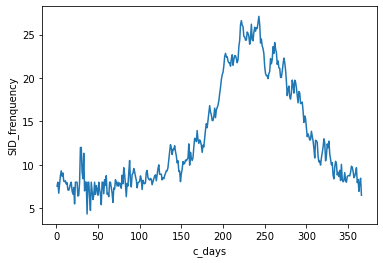

In [21]:
#3.8续(2)
#每年第几天对应的不同台风次数，作图
N_C.groupby(['c_days']).mean()['SID'].plot()
plt.ylabel('SID_frenquency') 

In [22]:
#3.9
#新建一列，第[3]列
N_C['anomaly']=0
for i in range(len(N_C)):
    #第[2]列第[i]个位置对应的数据，即对应的c_days数
    m=N_C.iloc[i,2]
    #将第[3]列anomaly列更新为date对应的异常值（异常值为每个date对应的SID减去天数对应的SID平均值）
    N_C.iloc[i,3]=N_C.iloc[i,1]-N_C.groupby(['c_days']).mean()['SID'].loc[m]    
N_C

,date,SID,c_days,anomaly
0,1970-02-19,8,50.0,1.500000
1,1970-02-20,8,51.0,0.000000
2,1970-02-21,8,52.0,0.833333
3,1970-02-22,8,53.0,1.400000
4,1970-02-23,8,54.0,2.600000
...,...,...,...,...
10812,2022-10-04,9,277.0,-8.980769
10813,2022-10-05,7,278.0,-11.693878
10814,2022-10-09,1,282.0,-17.301887
10815,2022-10-10,7,283.0,-12.769231


Text(0, 0.5, 'the anomaly')

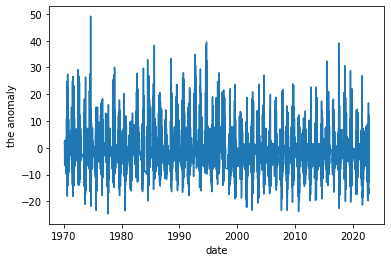

In [23]:
#3.9续
N_C.groupby(['date']).mean()['anomaly'].plot()
plt.ylabel('the anomaly') 

Text(0, 0.5, 'the anomaly (/yr)')

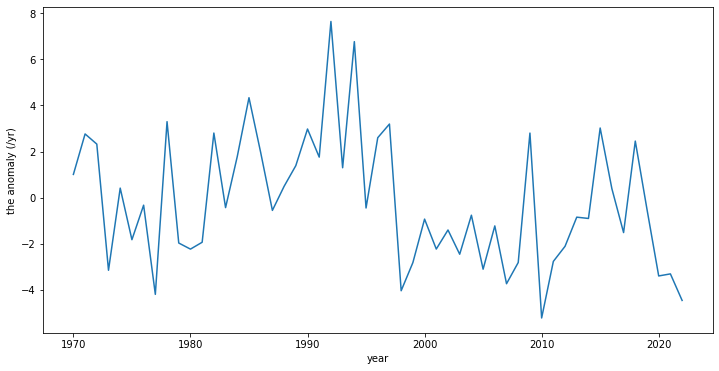

In [24]:
#3.10
#新建年份列
N_C['year']=pd.to_datetime(N_C['date']).dt.year
plt.figure(figsize=(12,6))
#根据年份作台风异常值图
N_C.groupby(['year']).mean()['anomaly'].plot()
plt.ylabel('the anomaly (/yr)') 

# 从由图可知，1992、1994、2010年最有可能会出现异常飓风活动

4. Explore a data set

In [25]:
#4.1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
ozone=pd.read_excel("20220502-20220507Office ozone.xlsx",
                    usecols=range(5),
                    skiprows=[1], 
                    parse_dates=['D/T'])
ozone.head(10)

,日记号,臭氧浓度ppb,date,time,D/T
0,1,-0.1,2022-05-02,10:40:17,2022-05-02 10:40:17
1,2,0.1,2022-05-02,10:41:17,2022-05-02 10:41:17
2,3,-0.4,2022-05-02,10:42:17,2022-05-02 10:42:17
3,4,2.4,2022-05-02,10:43:17,2022-05-02 10:43:17
4,5,1.8,2022-05-02,10:44:17,2022-05-02 10:44:17
5,6,2.2,2022-05-02,10:45:17,2022-05-02 10:45:17
6,7,1.6,2022-05-02,10:46:17,2022-05-02 10:46:17
7,8,3.1,2022-05-02,10:47:17,2022-05-02 10:47:17
8,9,2.5,2022-05-02,10:48:17,2022-05-02 10:48:17
9,10,2.1,2022-05-02,10:49:17,2022-05-02 10:49:17


In [26]:
#4.1续
ozone1=ozone.loc[ozone['臭氧浓度ppb']>=0]
ozone1.head(10)

,日记号,臭氧浓度ppb,date,time,D/T
1,2,0.1,2022-05-02,10:41:17,2022-05-02 10:41:17
3,4,2.4,2022-05-02,10:43:17,2022-05-02 10:43:17
4,5,1.8,2022-05-02,10:44:17,2022-05-02 10:44:17
5,6,2.2,2022-05-02,10:45:17,2022-05-02 10:45:17
6,7,1.6,2022-05-02,10:46:17,2022-05-02 10:46:17
7,8,3.1,2022-05-02,10:47:17,2022-05-02 10:47:17
8,9,2.5,2022-05-02,10:48:17,2022-05-02 10:48:17
9,10,2.1,2022-05-02,10:49:17,2022-05-02 10:49:17
10,11,2.1,2022-05-02,10:50:17,2022-05-02 10:50:17
11,12,2.2,2022-05-02,10:51:17,2022-05-02 10:51:17


<AxesSubplot:title={'center':'Plot of hourly concentration of ozone in offices'}, xlabel='D/T', ylabel='O3/ppb'>

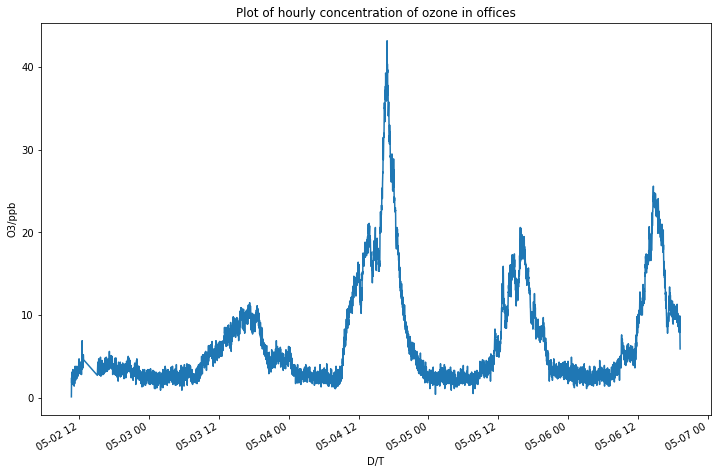

In [27]:
#4.2
#将ozone1['date']、ozone1['hour']转化为时间型数据
ozone1['date']=pd.to_datetime(ozone1['date'])
ozone1['hour']=pd.to_datetime(ozone1['D/T']).dt.hour
#作图
plt.figure(figsize=(12,8))
plt.title('Plot of hourly concentration of ozone in offices') 
plt.ylabel('O3/ppb') 
ozone1.groupby(['D/T']).mean()['臭氧浓度ppb'].plot()

#臭氧时间序列图（1min平均）

<AxesSubplot:xlabel='date,hour'>

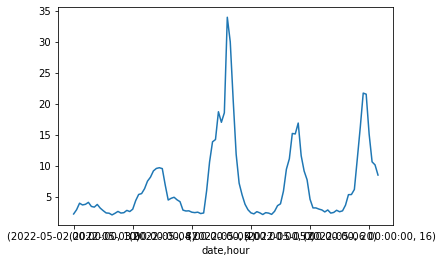

In [28]:
#4.3（1）
#观察臭氧时间序列图（1h平均）
ozone1['hour']=ozone1['hour'].astype(int)
ozone1.groupby(['date','hour']).mean()['臭氧浓度ppb'].plot()

In [29]:
#4.3（2）
#找出监测时间段内的臭氧浓度（小时浓度）最大值
o=ozone1.groupby(['date','hour']).mean()['臭氧浓度ppb'].max()
o  

34.005

<AxesSubplot:xlabel='hour'>

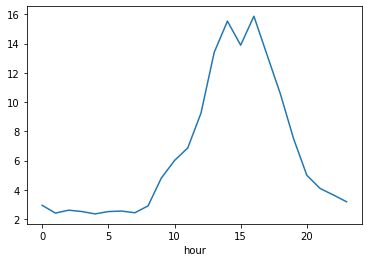

In [30]:
#4.3（3）
#观察监测时间内，一天内臭氧小时变化
ozone1.groupby(['hour']).mean()['臭氧浓度ppb'].plot()

In [31]:
#4.3（4）
#计算白天（早上八点到晚上八点）臭氧小时平均浓度
ozone1_day=ozone1.loc[(ozone1['hour']>=8)&(ozone1['hour']<=20)]
ozone1_day.groupby(['hour']).mean()['臭氧浓度ppb']

#计算夜间臭氧平均浓度
ozone1_night=ozone1.loc[(ozone1['hour']<8)|(ozone1['hour']>20)]
ozone1_night.groupby(['hour']).mean()['臭氧浓度ppb']

hour
0     2.946667
1     2.414167
2     2.614583
3     2.521667
4     2.358750
5     2.519583
6     2.553333
7     2.437083
21    4.100417
22    3.657083
23    3.190417
Name: 臭氧浓度ppb, dtype: float64

<AxesSubplot:xlabel='day'>

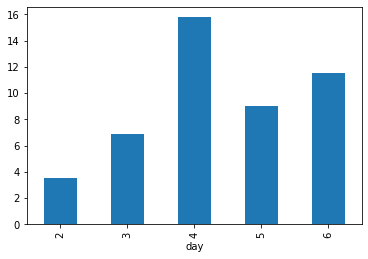

In [33]:
#4.3（5）
#观察这几天臭氧平均浓度随天数变化
ozone1_day['day']=pd.to_datetime(ozone1_day['D/T']).dt.day
ozone1_day.groupby(['day']).mean()['臭氧浓度ppb'].plot(kind="bar")

<AxesSubplot:xlabel='D/T'>

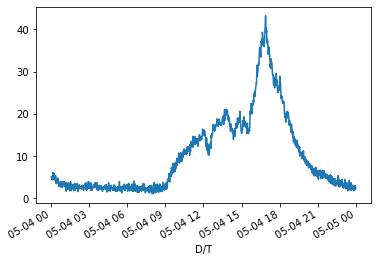

In [34]:
#4.3（6）
#放大2022年5月4日当天的臭氧变化情况
ozone1_5_3=ozone1.loc[ozone1['date'].astype(str).str.contains('2022-05-04')]
ozone1_5_3.groupby(['D/T']).mean()['臭氧浓度ppb'].plot() 

#2022-05-02~2022-05-07中5月4号室内臭氧浓度最大，达43.2ppb（1min平均）；
#室内臭氧趋势同室外类似，时间上稍延后室外，浓度呈现早低晚低下午高的趋势；
#整体上一天当中14：00-17：00室内臭氧浓度最高；
#室内臭氧浓度会受人为活动影响，出现一些小波动。